In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import plotly.express as px

C:\Users\jijin\AppData\Local\Temp\ipykernel_5284\1088160451.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
data=pd.read_csv('pokemon.csv')

In [3]:
data.head()

,number,pokemon_name,pic_url,main_type,secondary_type,region,category,height,weight,pokemon_family,...,resistance,weakness,wild_avail,egg_avail,raid_avail,research_avail,shiny,shadow,pkedex_desc,poss_attacks
0,1,Bulbasaur,https://static.wikia.nocookie.net/pokemongo/im...,Grass,Poison,Kanto,Seed,0.7 m,6.9 kg,Bulbasaur family,...,"{'62.5%': ['Electric', 'Fairy', 'Fighting', 'W...","{'160%': ['Fire', 'Flying', 'Ice', 'Psychic']}",Yes,No,Formerly (1st tier level),Yes,Yes,Yes,Bulbasaur can be seen napping in bright sunlig...,"['Tackle', 'Vine Whip', 'Power Whip', 'Seed Bo..."
1,2,Ivysaur,https://static.wikia.nocookie.net/pokemongo/im...,Grass,Poison,Kanto,Seed,1 m,13 kg,Bulbasaur family,...,"{'62.5%': ['Electric', 'Fairy', 'Fighting', 'W...","{'160%': ['Fire', 'Flying', 'Ice', 'Psychic']}",Yes,No,Formerly (1st tier level),No,Yes,Yes,There is a bud on this Pokémon's back. To supp...,"['Razor Leaf', 'Vine Whip', 'Power Whip', 'Slu..."
2,3,Venusaur,https://static.wikia.nocookie.net/pokemongo/im...,Grass,Poison,Kanto,Seed,2 m,100 kg,Bulbasaur family,...,"{'62.5%': ['Electric', 'Fairy', 'Fighting', 'W...","{'160%': ['Fire', 'Flying', 'Ice', 'Psychic']}",Yes,No,Formerly (3rd tier level),Formerly,Yes,Yes,Standard Pokédex description\nThere is a large...,"['Razor Leaf', 'Vine Whip', 'Petal Blizzard', ..."
3,4,Charmander,https://static.wikia.nocookie.net/pokemongo/im...,Fire,NaN,Kanto,Lizard,0.6 m,8.5 kg,Charmander family,...,"{'62.5%': ['Bug', 'Fairy', 'Fire', 'Grass', 'I...","{'160%': ['Ground', 'Rock', 'Water']}",Yes,No,Formerly (1st tier level),Yes,Yes,Yes,The flame that burns at the tip of its tail is...,"['Ember', 'Scratch', 'Flame Burst', 'Flame Cha..."
4,5,Charmeleon,https://static.wikia.nocookie.net/pokemongo/im...,Fire,NaN,Kanto,Flame,1.1 m,19 kg,Charmander family,...,"{'62.5%': ['Bug', 'Fairy', 'Fire', 'Grass', 'I...","{'160%': ['Ground', 'Rock', 'Water']}",Yes,No,Formerly (2nd tier level),Formerly,Yes,Yes,Charmeleon mercilessly destroys its foes using...,"['Ember', 'Fire Fang', 'Scratch', 'Fire Punch'..."


In [4]:
data.shape

(770, 29)

Top 10 families of pokemon

In [5]:
family=data['pokemon_family'].value_counts()[:10]

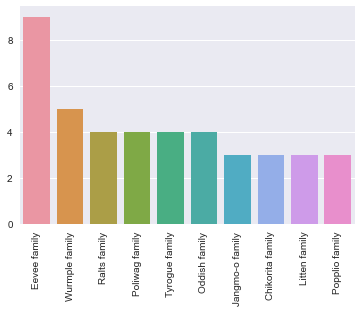

In [6]:
sns.barplot(x=family.index,y=family.values)
plt.xticks(rotation=90)
plt.show()

scatter plot for attack vs stamina & scatter plot for defense vs stamina

<AxesSubplot: xlabel='defense', ylabel='attack'>

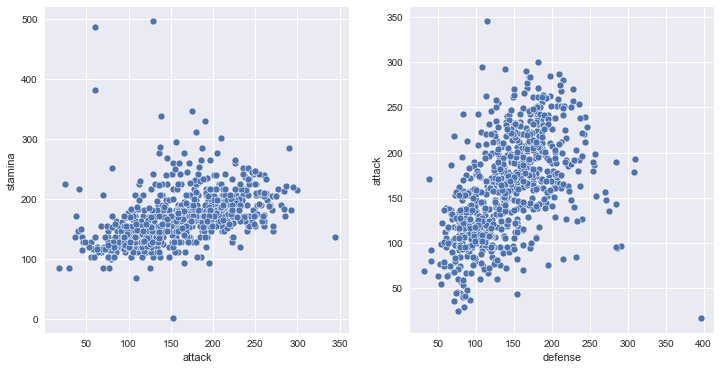

In [7]:
fig, ax = plt.subplots(1,2,figsize=(12,6))
sns.scatterplot(x=data.attack,y=data.stamina,ax=ax[0])
ax[0].set_xlabel('attack')
ax[0].set_ylabel('stamina')
sns.scatterplot(x=data.defense,y=data.attack,ax=ax[1])

top 10 pokemon with high attack ratio

In [8]:
total=data.groupby('pokemon_family')['attack','stamina','defense'].mean().sort_values(by='attack',ascending=False)[:10]

C:\Users\jijin\AppData\Local\Temp\ipykernel_5284\4056838193.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  total=data.groupby('pokemon_family')['attack','stamina','defense'].mean().sort_values(by='attack',ascending=False)[:10]


In [9]:
total

,attack,stamina,defense
pokemon_family,,,
Deoxys family,345.0,137.0,115.0
Mewtwo family,300.0,214.0,182.0
Regigigas family,287.0,221.0,210.0
Darkrai family,285.0,172.0,198.0
Rayquaza family,284.0,213.0,170.0
Palkia family,280.0,189.0,215.0
Zekrom family,275.0,205.0,211.0
Dialga family,275.0,205.0,211.0
Reshiram family,275.0,205.0,211.0


In [10]:
x=[]
for i in data.weight.to_list():
    val =round(float(i.strip().split()[0]))
    x.append(val)

In [11]:
data['kg']=x

In [12]:
ratio = data.kg/data.attack

In [13]:
data['attack_r']=ratio

In [14]:
dummy=data.sort_values('attack_r',ascending=False)[:10]
dummy

,number,pokemon_name,pic_url,main_type,secondary_type,region,category,height,weight,pokemon_family,...,wild_avail,egg_avail,raid_avail,research_avail,shiny,shadow,pkedex_desc,poss_attacks,kg,attack_r
486,487,Giratina,https://static.wikia.nocookie.net/pokemongo/im...,Ghost,Dragon,Sinnoh,Renegade,4.5 m,750 kg,Giratina family,...,No,No,Formerly (5th tier level),No,Yes,No,It was banished for its violence. It silently ...,"['Dragon Breath', 'Shadow Claw', 'Ancient Powe...",750,4.010695
756,809,Melmetal,https://static.wikia.nocookie.net/pokemongo/im...,Steel,NaN,Unknown,Hex,2.5 m,800 kg,Meltan family,...,No,No,No,No,Yes,No,Revered long ago for its capacity to create ir...,"['Thunder Shock', 'Flash Cannon', 'Hyper Beam'...",800,3.539823
382,383,Groudon,https://static.wikia.nocookie.net/pokemongo/im...,Ground,NaN,Hoenn,Continent,3.51 m,950 kg,Groudon family,...,No,No,Formerly (5th tier level),No,Yes,No,Standard Pokédex description\nGroudon is said ...,"['Dragon Tail', 'Mud Shot', 'Earthquake', 'Fir...",950,3.518519
717,718,Zygarde,https://static.wikia.nocookie.net/pokemongo/im...,Dragon,Ground,Kalos,Order,4.5 m,610.0 kg,Zygarde family,...,No,No,No,No,No,No,Standard Pokédex description\nWhen the Kalos r...,"['Bite', 'Dragon Tail', 'Zen Headbutt', 'Bulld...",610,3.004926
207,208,Steelix,https://static.wikia.nocookie.net/pokemongo/im...,Steel,Ground,Johto,Iron,9.2 m,400 kg,Onix family,...,No,No,No,No,Yes,No,Standard Pokédex description\nSteelix lives ev...,"['Dragon Tail', 'Iron Tail', 'Thunder Fang', '...",400,2.702703
712,713,Avalugg,https://static.wikia.nocookie.net/pokemongo/im...,Ice,NaN,Kalos,Iceberg,2.0 m,505.0 kg,Bergmite family,...,No,No,No,No,No,No,Its ice-covered body is as hard as steel. Its ...,"['Bite', 'Ice Fang', 'Avalanche', 'Body Slam',...",505,2.576531
475,476,Probopass,https://static.wikia.nocookie.net/pokemongo/im...,Rock,Steel,Sinnoh,Compass,1.4 m,340 kg,Nosepass family,...,No,No,No,No,Yes,Yes,It uses three small units to catch prey and ba...,"['Rock Throw', 'Spark', 'Magnet Bomb', 'Rock S...",340,2.518519
482,483,Dialga,https://static.wikia.nocookie.net/pokemongo/im...,Steel,Dragon,Sinnoh,Temporal,5.4 m,683 kg,Dialga family,...,No,No,Formerly (5th tier level),No,Yes,No,It has the power to control time. It appears i...,"['Dragon Breath', 'Metal Claw', 'Draco Meteor'...",683,2.483636
94,95,Onix,https://static.wikia.nocookie.net/pokemongo/im...,Rock,Ground,Kanto,Rock,8.8 m,210 kg,Onix family,...,Yes,No,Formerly (1st tier level),Yes,Yes,No,Onix has a magnet in its brain. It acts as a c...,"['Rock Throw', 'Tackle', 'Heavy Slam', 'Sand T...",210,2.470588
142,143,Snorlax,https://static.wikia.nocookie.net/pokemongo/im...,Normal,NaN,Kanto,Sleeping,2.1 m,460 kg,Snorlax family,...,Yes,No,Formerly (3rd tier level),Formerly,Yes,Yes,Snorlax's typical day consists of nothing more...,"['Lick', 'Zen Headbutt', 'Yawn', 'Body Slam', ...",460,2.421053


<AxesSubplot: xlabel='pokemon_name', ylabel='attack_r'>

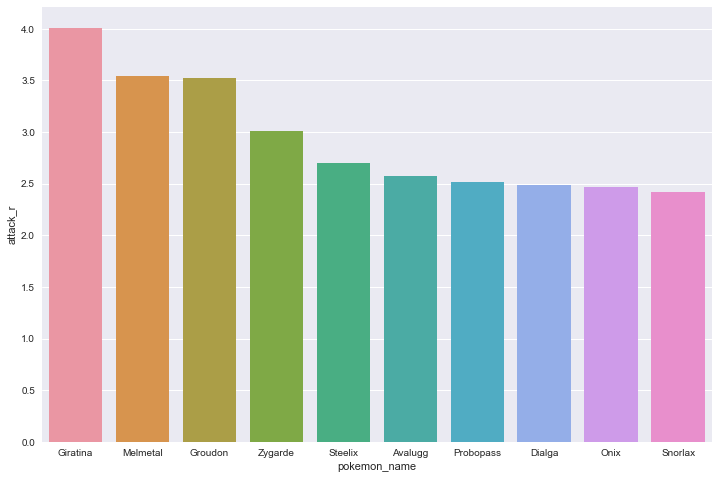

In [15]:
plt.figure(figsize=(12,8))
sns.barplot(x=dummy.pokemon_name,y=dummy.attack_r)

Top 10 heavy weighted pokemons

In [16]:
data1=data.groupby('pokemon_name')['kg'].mean().sort_values(ascending=False)[:10]
data1

pokemon_name
Groudon      950.0
Melmetal     800.0
Giratina     750.0
Dialga       683.0
Zygarde      610.0
Metagross    550.0
Avalugg      505.0
Snorlax      460.0
Heatran      430.0
Regigigas    420.0
Name: kg, dtype: float64

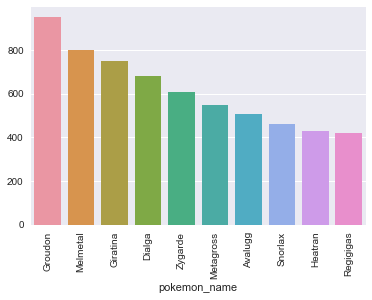

In [17]:
sns.barplot(x=data1.index,y=data1.values)
plt.xticks(rotation=90)
plt.show()

Top 10 largest pokemons

In [18]:
y=[]
for m in data.height.to_list():
    height=float(m.split()[0])
    y.append(height)

In [19]:
data['metre']=y

In [20]:
height_pk=data.groupby('pokemon_name')['metre'].mean().sort_values(ascending=False)[:10]

In [21]:
height_pk

pokemon_name
Wailord     14.50
Steelix      9.20
Onix         8.80
Rayquaza     7.01
Gyarados     6.50
Milotic      6.20
Yveltal      5.80
Dialga       5.40
Lugia        5.21
Giratina     4.50
Name: metre, dtype: float64

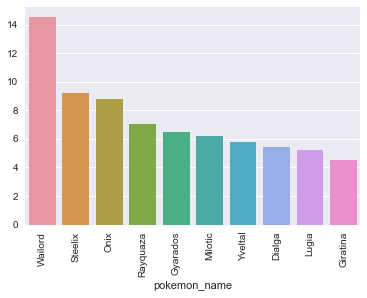

In [22]:
sns.barplot(x=height_pk.index,y=height_pk.values)
plt.xticks(rotation=90)
plt.show()

Regions where pokemons are found

In [23]:
pc=data['region'].value_counts()

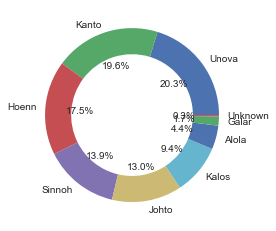

In [24]:
plt.pie(pc,labels=pc.index,autopct = '%1.1f%%', wedgeprops={'width': 0.3})
plt.show()

In [25]:
data.head(2)

,number,pokemon_name,pic_url,main_type,secondary_type,region,category,height,weight,pokemon_family,...,egg_avail,raid_avail,research_avail,shiny,shadow,pkedex_desc,poss_attacks,kg,attack_r,metre
0,1,Bulbasaur,https://static.wikia.nocookie.net/pokemongo/im...,Grass,Poison,Kanto,Seed,0.7 m,6.9 kg,Bulbasaur family,...,No,Formerly (1st tier level),Yes,Yes,Yes,Bulbasaur can be seen napping in bright sunlig...,"['Tackle', 'Vine Whip', 'Power Whip', 'Seed Bo...",7,0.059322,0.7
1,2,Ivysaur,https://static.wikia.nocookie.net/pokemongo/im...,Grass,Poison,Kanto,Seed,1 m,13 kg,Bulbasaur family,...,No,Formerly (1st tier level),No,Yes,Yes,There is a bud on this Pokémon's back. To supp...,"['Razor Leaf', 'Vine Whip', 'Power Whip', 'Slu...",13,0.086093,1.0


jointplot for kg vs attack ratio

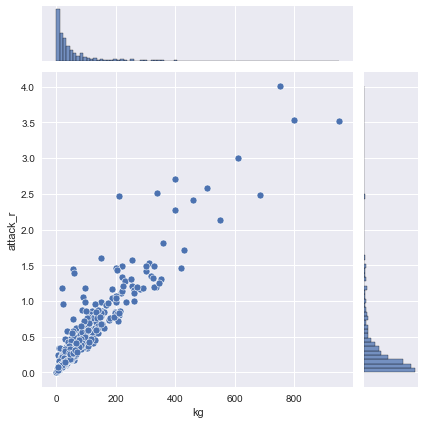

In [26]:
sns.jointplot(x=data.kg,y=data.attack_r)

<AxesSubplot: >

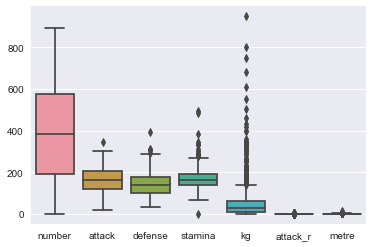

In [27]:
sns.boxplot(data=data) #barplot to find if there is a outlier in data

Distribution plot for height

<AxesSubplot: xlabel='metre', ylabel='Density'>

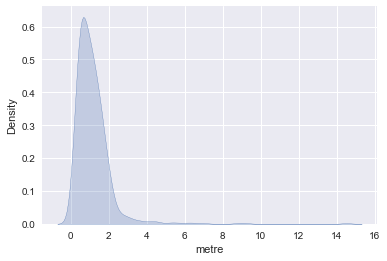

In [28]:
sns.kdeplot(data.metre,fill =True)